# Otroške knjige

Za projektno nalogo sem iz spletne strani www.goodreads.com zajela podatke iz treh različnih list, na katerih so otroške knjige ocenjene po priljubljenosti. Iz vsake od list sem zajela prvih 1200 knjig - po prvih 1200 knjigah namreč glasovi drastično upadejo, določeno mesto si deli tudi po deset knjig in več. Liste, ki sem jih izbrala, so [Favorite books from my childhood](http://www.goodreads.com/list/show/226.Favorite_books_from_my_childhood) (nadalje lista 1), [What book got you hooked?](http://www.goodreads.com/list/show/651.What_Book_Got_You_Hooked_) (lista 2) in [Best children's books](http://www.goodreads.com/list/show/86.Best_Children_s_Books) (lista 3).

Podatki so ločeni v pet csv datotek:
* lista1.csv
* lista2.csv
* lista3.csv
* avtorji.csv
* naslovi.csv

Liste vsebujejo mesto, na katerega se je knjiga uvrstila, id knjige in id avtorja, oceno, št. glasov in skupno oceno - ta je odvisna od števila glasov, ocene ter drugih dejavnikov, ki na spletni strani niso posebej specificirani.
Datoteka avtorji vsebuje ime avtorja ter njegov id, datoteka naslovi pa naslov knjige in id knjige.


## Uvod

Naložimo datoteke in si oglejmo nekaj osnovnih tabel.

In [149]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import MaxNLocator
% matplotlib inline 


# naložimo razpredelnice, s katerimi bomo delali
avtorji = pd.read_csv('../csv_datoteke/avtor.csv', index_col='id_avt')
lista1 = pd.read_csv('../csv_datoteke/tabela1.csv')
lista2 = pd.read_csv('../csv_datoteke/tabela2.csv')
lista3 = pd.read_csv('../csv_datoteke/tabela3.csv')
naslovi = pd.read_csv('../csv_datoteke/naslov.csv', index_col='id_nasl')


# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 16 vrstic in stolpcev
pd.options.display.max_rows = 16
pd.options.display.max_columns = 16


#nastavitve za grafe
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)


In [114]:
# tabela avtorjev
avtorji

,avtor
id_avt,
988142,E.B. White
2041,Frances Hodgson Burnett
1069006,C.S. Lewis
5350,L.M. Montgomery
1315,Louisa May Alcott
4273,Roald Dahl
4489,Maurice Sendak
106,Madeleine L&#39;Engle
...,...


In [115]:
# ena izmed list
lista1

,mesto,id_nasl,id_avt,ocena,st_glasov,ocena_skupaj
0,1,24178,988142,4.14,1021663,151594
1,2,2998,2041,4.11,657537,116234
2,3,100915,1069006,4.19,1487021,113719
3,4,8127,5350,4.22,509181,107096
4,5,1934,1315,4.03,1262538,98256
5,6,39988,4273,4.28,449574,94659
6,7,6310,4273,4.10,483822,81032
7,8,19543,4489,4.22,607025,74583
...,...,...,...,...,...,...
1192,1191,994547,10657,4.00,879,177


In [116]:
# zgornja tabela, združena s tabelo avtorjev
lista3.join(avtorji, on = 'id_avt')

,mesto,id_nasl,id_avt,ocena,st_glasov,ocena_skupaj,avtor
0,1,19543,4489,4.22,607025,106056,Maurice Sendak
1,2,4948,3362,4.28,289736,100936,Eric Carle
2,3,370493,435477,4.38,673811,97748,Shel Silverstein
3,4,23772,61105,4.29,452386,92798,Dr. Seuss
4,5,32929,18479,4.27,247113,73731,Margaret Wise Brown
5,6,24178,988142,4.14,1021663,69226,E.B. White
6,7,30119,435477,4.28,997917,63486,Shel Silverstein
7,8,233093,61105,4.15,310680,62318,Dr. Seuss
...,...,...,...,...,...,...,...
1192,1189,19336,11593,4.04,7847,128,Beatrix Potter


In [117]:
# tabela naslovov
naslovi

,naslov
id_nasl,
24178,Charlotte's Web
2998,The Secret Garden
100915,"The Lion, the Witch, and the Wardrobe (Chronic..."
8127,"Anne of Green Gables (Anne of Green Gables, #1)"
1934,"Little Women (Little Women, #1)"
39988,Matilda
6310,Charlie and the Chocolate Factory (Charlie Buc...
19543,Where the Wild Things Are
...,...


In [118]:
# listi pridružimo tabelo naslovov
lista3.join(naslovi, on = 'id_nasl')

,mesto,id_nasl,id_avt,ocena,st_glasov,ocena_skupaj,naslov
0,1,19543,4489,4.22,607025,106056,Where the Wild Things Are
1,2,4948,3362,4.28,289736,100936,The Very Hungry Caterpillar
2,3,370493,435477,4.38,673811,97748,The Giving Tree
3,4,23772,61105,4.29,452386,92798,Green Eggs and Ham
4,5,32929,18479,4.27,247113,73731,Goodnight Moon
5,6,24178,988142,4.14,1021663,69226,Charlotte's Web
6,7,30119,435477,4.28,997917,63486,Where the Sidewalk Ends
7,8,233093,61105,4.15,310680,62318,The Cat in the Hat
...,...,...,...,...,...,...,...
1192,1189,19336,11593,4.04,7847,128,The Tale of Jemima Puddle-Duck


## Analiza podatkov

### Najboljše knjige 

Najprej si oglejmo, katere so najbolje ocenjene knjige prve, druge in tretje liste.

In [119]:
# najboljše knjige liste 1
lista1.join(naslovi, on = 'id_nasl').head(10)[['mesto', 'ocena', 'st_glasov', 'ocena_skupaj', 'naslov']]

,mesto,ocena,st_glasov,ocena_skupaj,naslov
0,1,4.14,1021663,151594,Charlotte's Web
1,2,4.11,657537,116234,The Secret Garden
2,3,4.19,1487021,113719,"The Lion, the Witch, and the Wardrobe (Chronic..."
3,4,4.22,509181,107096,"Anne of Green Gables (Anne of Green Gables, #1)"
4,5,4.03,1262538,98256,"Little Women (Little Women, #1)"
5,6,4.28,449574,94659,Matilda
6,7,4.10,483822,81032,Charlie and the Chocolate Factory (Charlie Buc...
7,8,4.22,607025,74583,Where the Wild Things Are
8,9,4.04,613244,72375,"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)"
9,10,4.15,167759,70652,"Little House in the Big Woods (Little House, #1)"


In [120]:
# najboljše knjige liste 2
lista2.join(naslovi, on = 'id_nasl').head(10)[['mesto', 'ocena', 'st_glasov', 'ocena_skupaj', 'naslov']]

,mesto,ocena,st_glasov,ocena_skupaj,naslov
0,1,4.43,4445378,193641,Harry Potter and the Sorcerer's Stone (Harry P...
1,2,4.19,188942,105937,"Little House on the Prairie (Little House, #2)"
2,3,4.14,1021663,101622,Charlotte's Web
3,4,4.19,1487021,87985,"The Lion, the Witch, and the Wardrobe (Chronic..."
4,5,3.57,3734222,78428,"Twilight (Twilight, #1)"
5,6,4.04,613244,71259,"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)"
6,7,4.11,657537,65743,The Secret Garden
7,8,4.35,4669681,65720,"The Hunger Games (The Hunger Games, #1)"
8,9,4.22,509181,62723,"Anne of Green Gables (Anne of Green Gables, #1)"
9,10,4.24,2102010,62677,The Hobbit


In [121]:
# najboljše knjige liste 3
lista3.join(naslovi, on = 'id_nasl').head(10)[['mesto', 'ocena', 'st_glasov', 'ocena_skupaj', 'naslov']]

,mesto,ocena,st_glasov,ocena_skupaj,naslov
0,1,4.22,607025,106056,Where the Wild Things Are
1,2,4.28,289736,100936,The Very Hungry Caterpillar
2,3,4.38,673811,97748,The Giving Tree
3,4,4.29,452386,92798,Green Eggs and Ham
4,5,4.27,247113,73731,Goodnight Moon
5,6,4.14,1021663,69226,Charlotte's Web
6,7,4.28,997917,63486,Where the Sidewalk Ends
7,8,4.15,310680,62318,The Cat in the Hat
8,9,4.23,187460,60762,If You Give a Mouse a Cookie
9,10,4.34,154501,50881,Love You Forever


Na koliko listah se pojavi vsaka izmed zgoraj omenjenih knjig?

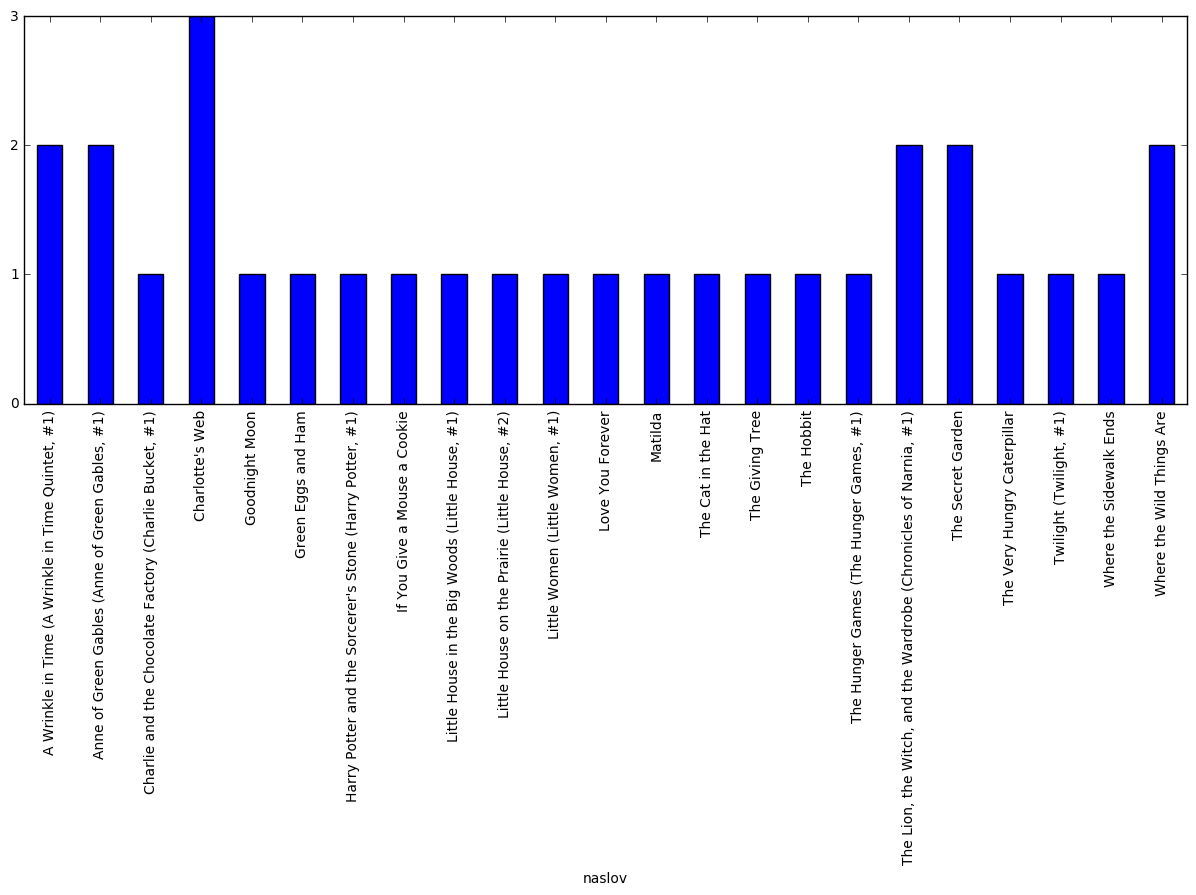

In [158]:
naj1 = lista1.join(naslovi, on = 'id_nasl').head(10)
naj2 = lista2.join(naslovi, on = 'id_nasl').head(10)
naj3 = lista3.join(naslovi, on = 'id_nasl').head(10)
naj_graf = pd.concat([naj1, naj2, naj3]).groupby('naslov').count()['mesto'].plot(kind='bar')
naj_graf.yaxis.set_major_locator(MaxNLocator(integer=True))


Med desetimi najboljšimi knjigami posamezne liste se samo en naslov pojavi trikrat - Charlotte's web. To je verjetno posledica tega, da so različni bralci glasovali in dodajali knjige na posamezno listo. Ta sklep potrjuje tudi dejstvo, da je samo 251 knjig skupnih vsem trem listam (več o teh knjigah v nadaljevanju). Za boljši vpogled bi seveda morali obravnavati več list. Precej malo je tudi knjig, ki se pojavijo na vsaj dveh listah. Oglejmo si, kdo so njihovi avtorji.

In [123]:
naj1 = lista1.join(naslovi, on = 'id_nasl').head(10)
naj2 = lista2.join(naslovi, on = 'id_nasl').head(10)
naj3 = lista3.join(naslovi, on = 'id_nasl').head(10)
naj = pd.concat([naj1, naj2, naj3])
st_pojavitev = naj.groupby('naslov').count()[['mesto']]
st_pojavitev_2 = st_pojavitev[(st_pojavitev['mesto'] >= 2)]
naj.join(st_pojavitev_2, on = 'naslov', how = 'inner', lsuffix='_l', rsuffix='_r'
        ).join(avtorji, on = 'id_avt').drop_duplicates('naslov')[['naslov', 'avtor']]


,naslov,avtor
0,Charlotte's Web,E.B. White
1,The Secret Garden,Frances Hodgson Burnett
2,"The Lion, the Witch, and the Wardrobe (Chronic...",C.S. Lewis
3,"Anne of Green Gables (Anne of Green Gables, #1)",L.M. Montgomery
7,Where the Wild Things Are,Maurice Sendak
8,"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)",Madeleine L&#39;Engle


### Najboljši avtorji

Kdo so najboljši avtorji znotraj posamezne liste?

In [124]:
l1 = lista1.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()
display(l1[['ocena_skupaj']])
l2 = lista2.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()
display(l2[['ocena_skupaj']])
l3 = lista3.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()
display(l3[['ocena_skupaj']])

,ocena_skupaj
avtor,
E.B. White,62530.666667
Frances Hodgson Burnett,59282.333333
Johanna Spyri,57180.000000
Scott O&#39;Dell,49650.000000
Anne Frank,49363.000000


,ocena_skupaj
avtor,
Harper Lee,50026.000000
J.K. Rowling,49806.000000
E.B. White,41207.333333
Frances Hodgson Burnett,28425.000000
Anne Frank,27774.000000


,ocena_skupaj
avtor,
Don Freeman,46354.0
Margery Williams,41825.0
H.A. Rey,38907.0
Jon Stone,37973.0
Bill Martin Jr.,36578.5


Nekaj avtorjev se pojavi na več listah:

In [125]:
l1 = lista1.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()
l2 = lista2.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()
l3 = lista3.join(avtorji, on = 'id_avt').groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False).head()

ponavljajoci_avtorji = pd.concat([l1, l2, l3])[['ocena_skupaj']].reset_index(level=['avtor']).groupby('avtor').count()
ponavljajoci_avtorji[(ponavljajoci_avtorji['ocena_skupaj'] >= 2)
                             ].rename(index=str, columns={"ocena_skupaj": "stevilo pojavitev"})

,stevilo pojavitev
avtor,
Anne Frank,2
E.B. White,2
Frances Hodgson Burnett,2


Kdo ima znotraj posamezne liste največje število knjig?

In [126]:
display(lista1.join(avtorji, on = 'id_avt')['avtor'].value_counts().head())
display(lista2.join(avtorji, on = 'id_avt')['avtor'].value_counts().head())
display(lista3.join(avtorji, on = 'id_avt')['avtor'].value_counts().head())

Enid Blyton       50
Dr. Seuss         26
Beverly Cleary    25
Walter Farley     16
Roald Dahl        15
Name: avtor, dtype: int64

Dr. Seuss        25
Carolyn Keene    21
Erin Hunter      19
R.L. Stine       15
Roald Dahl       13
Name: avtor, dtype: int64

Dr. Seuss          44
Sandra Boynton     17
L.M. Montgomery    16
Beverly Cleary     16
Cynthia Rylant     12
Name: avtor, dtype: int64

Opazimo, da se imena avtorjev, ki imajo najboljšo skupno oceno, ne ujemajo z imeni avtorjev, ki imajo na listah največ knjig. Bolj podrobno si bomo to povezavo ogledali v nadaljevanju, na listi, ki bo zajela knjige vseh treh list.

### Skupna lista
Združimo podatke vseh treh list. Kako si sledijo avtorji glede na skupno oceno na tej listi?


In [127]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')
skupna_avtorji.groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False)[:10]['ocena_skupaj']

avtor
E.B. White                 43076.666667
Margery Williams           34156.333333
Frances Hodgson Burnett    32952.333333
Harper Lee                 32820.333333
Don Freeman                30652.666667
Antoine de Saint-Exupry    29593.333333
Johanna Spyri              28224.666667
Anne Frank                 26714.000000
Jon Stone                  26528.333333
Shel Silverstein           26039.882353
Name: ocena_skupaj, dtype: float64

Kako pada priljubljenost med prvimi desetimi avtorji?

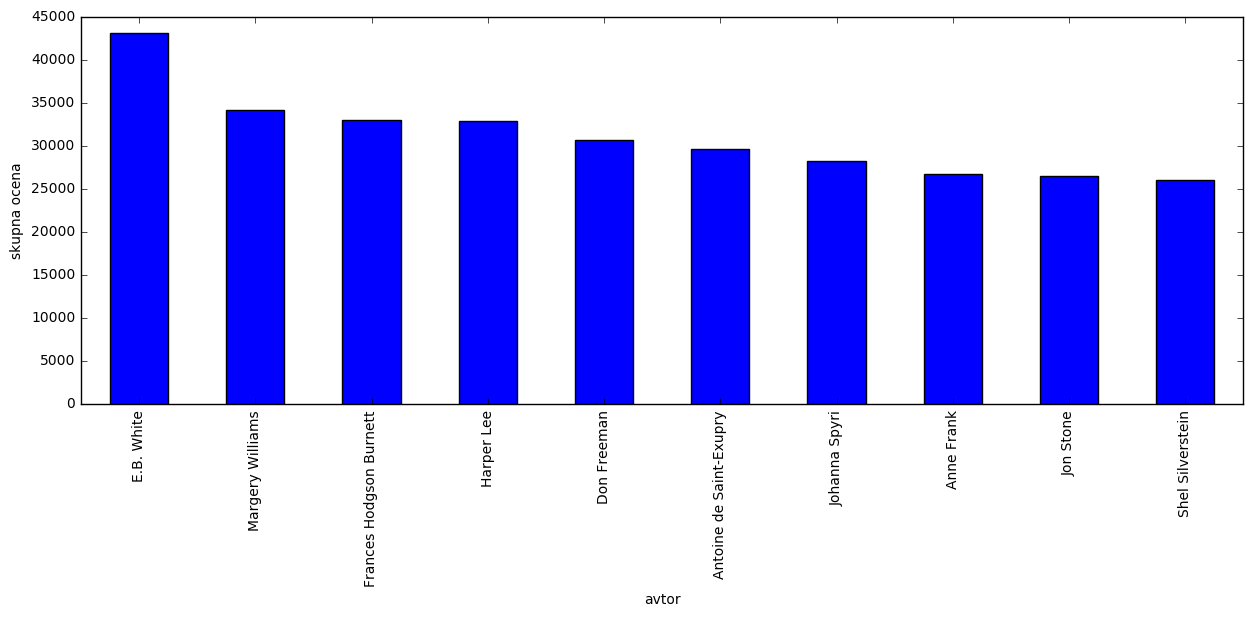

In [128]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')
skupna_avtorji.groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False)[:10]['ocena_skupaj'
                                                                             ].plot(kind = 'bar').set_ylabel("skupna ocena")

Avtor E. B. White ima precej boljšo oceno kot drugo uvrščena Margery Williams. Potem se razlike zmanjšajo, skupna ocena počasi pada.

Kateri avtor ima največ knjig na skupni listi?

In [129]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')
skupna_avtorji.groupby('avtor').size().sort_values(ascending=False)

avtor
Dr. Seuss          95
Enid Blyton        68
Beverly Cleary     53
Roald Dahl         40
L.M. Montgomery    31
Carolyn Keene      31
R.L. Stine         29
Judy Blume         28
                   ..
Keith Faulkner      1
Keiko Kasza         1
Kazuo Ishiguro      1
Kazu Kibuishi       1
Kathryn Otoshi      1
Kathryn Lasky       1
Kathryn Kenny       1
Johnny Gruelle      1
dtype: int64

Največ knjig na skupni listi ima Dr. Seuss. Da bomo imeli boljši pregled nad tem, kako št. knjig pada, si oglejmo graf za prvih 50 avtorjev iz zgornje razpredelnice.

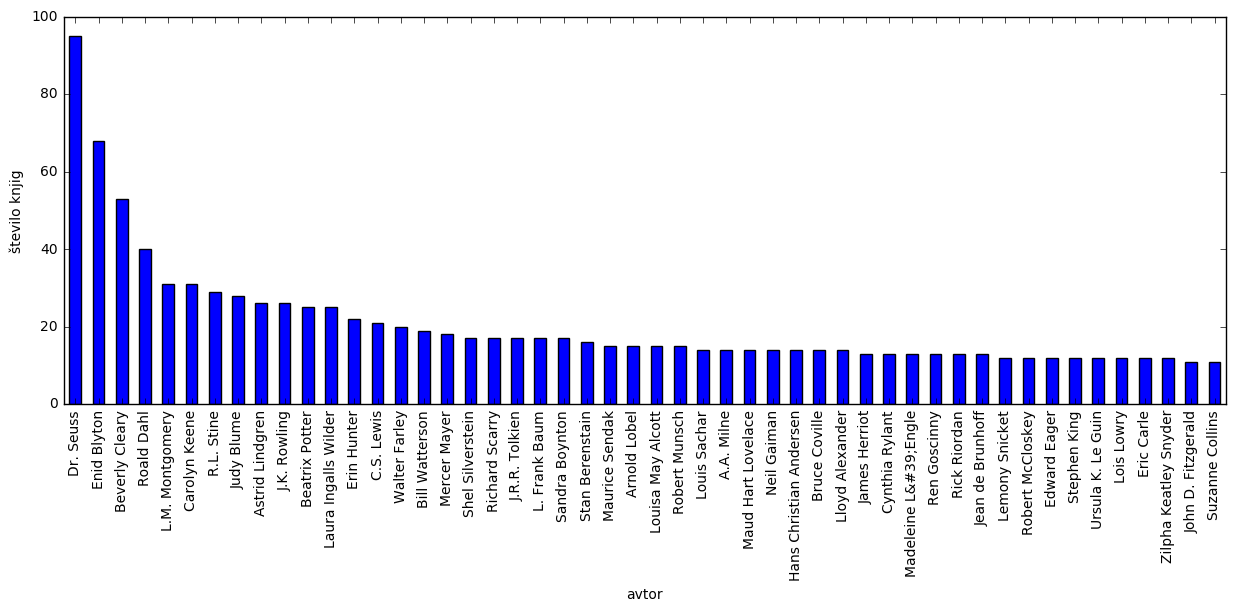

In [130]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')
skupna_avtorji.groupby('avtor').size().sort_values(ascending=False)[:50].plot(kind='bar').set_ylabel("število knjig")

Podobno kot pri prejšnjem grafu, najbolje uvrščeni avtor s precejšnjo razliko odstopa od ostalih. Na prvih nekaj mestih so  razlike v številu knjig še precej velike, potem postopno upadajo. Grafa sta si verjetno podobna zato, ker so ljudje ponavadi precej čustveno navezani na določene otroške knjige ali avtorje in jih močno favorizirajo. Poleg tega so določene knjige že "tradicionalno" brane in jih vsak pozna. Pri ostalih knjigah se mnenja začnejo bolj deliti, zato imajo te knjige manjšo razliko v skupni oceni oz. ima posamezen avtor uvrščenih manj knjig.

Poglejmo si sedaj, kakšna je povezava med št. knjig, ki jih ima avtor ter povprečno skupno oceno:

(0.0, 50000.0)

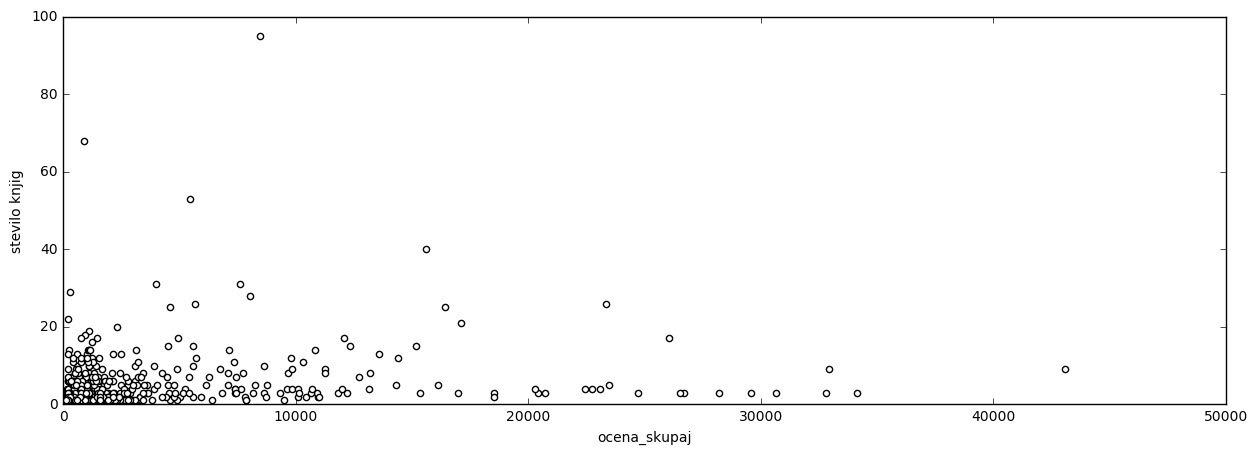

In [162]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')

na_oceno = skupna_avtorji.groupby('avtor').mean().sort_values('ocena_skupaj', ascending=False)[['ocena_skupaj']]
na_stevilo_knj = skupna_avtorji.groupby('avtor').count()[['mesto']].sort_values('mesto', ascending=False)

zdruzen = pd.concat((na_oceno, na_stevilo_knj), axis = 1).rename(index=str, columns={"mesto": "stevilo knjig"})
zdr_graf = zdruzen.plot(kind='scatter', x = 'ocena_skupaj', y = 'stevilo knjig', color='w')
zdr_graf.set_ylim(bottom=0.)
zdr_graf.set_xlim(left=0.)

Na grafu vsaka točka predstavlja enega avtorja. Kot že rečeno, imajo avtorji, ki so visoko uvrščeni glede na skupno oceno, malo knjig na listah. Avtorij, ki imajo zelo veliko število knjig, pa so slabše ocenjeni. Največ avtorjev ima seveda na listah malo knjig in tudi slabšo oceno, kar sta nakazovala že prejšnja grafa. 

Iz grafa vidimo, da posamezen avtor ni uspešen z veliko knjigami. Torej zagotovilo za "dobro" knjigo ni določen avtor, ampak njena vsebina. Po drugi strani so avtorji, ki imajo na listah uvrščenih veliko knjig, slabše ocenjeni tudi zato, ker  smo izračunali povprečje skupne ocene za avtorja. Avtorju, ki ima na listah več knjig in od tega samo eno knjigo dobro ocenjeno, ostale slabše ocenjene knjige znižajo skupno povprečje. 

Primer je po št. knjig prvo uvrščeni pisatelj Dr. Seuss. Na spodnjem grafu vidimo, da je prvih 13 knijig dobro ocenjenih, a ker ima skupno na listi kar 95 knjig, je povprečje skupnih ocen nizko (pod 10000). 

Spodnji graf prikazuje skupne ocene za vseh 95 knjig omenjenega avtorja.

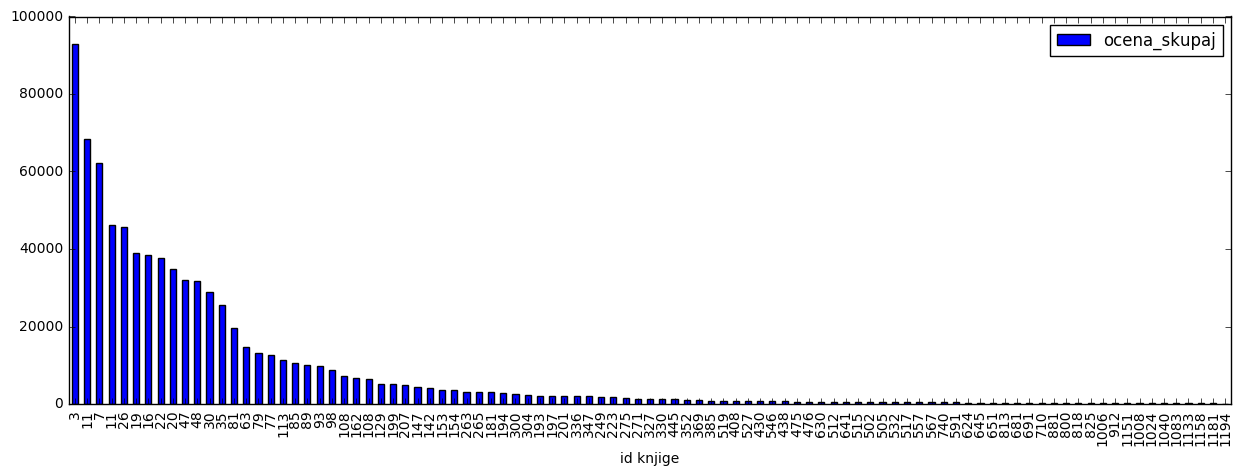

In [159]:
skupna_avtorji = pd.concat([lista1, lista2, lista3]).join(avtorji, on = 'id_avt')
seuss = skupna_avtorji[(skupna_avtorji['avtor'] == 'Dr. Seuss')
                      ].sort_values('ocena_skupaj', ascending=False)[['ocena_skupaj']].plot(kind = 'bar')

seuss.set_xlabel("id knjige")

### Porazdelitev ocene

Oglejmo si še, kako je porazdeljena ocena znotraj posamezne liste. Kako je ocenjen največji delež knjig?

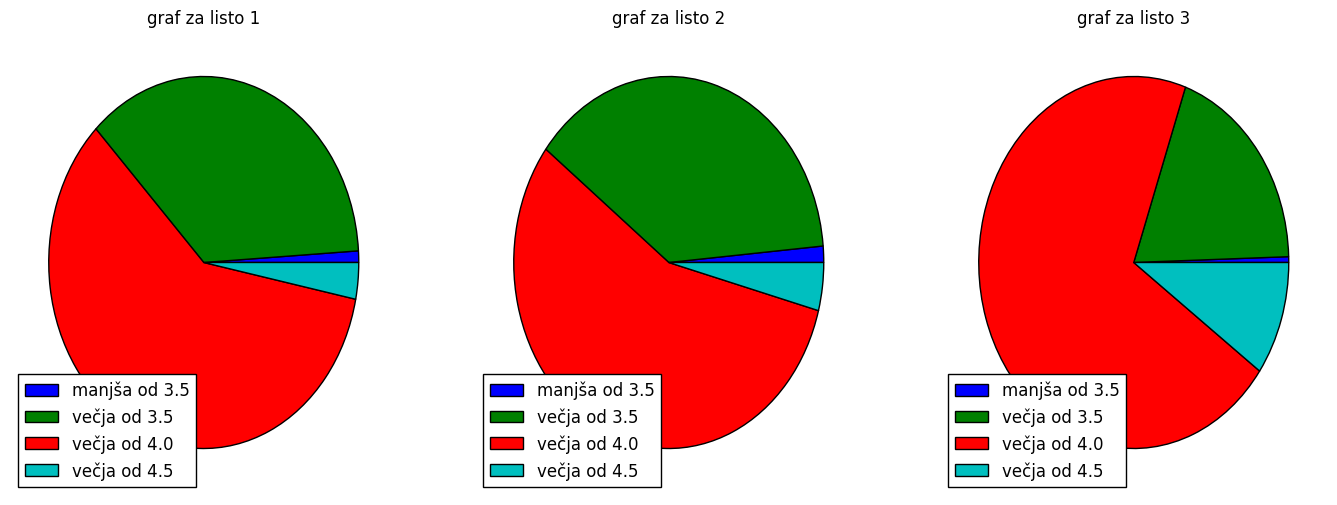

In [133]:
def GroupFunc(x):
    if x >= 4.5:
        return 'večja od 4.5'
    elif x >= 4.0 :
        return 'večja od 4.0'
    elif x >= 3.5:
        return 'večja od 3.5'
    else:
        return 'manjša od 3.5'

a = lista1.set_index(['ocena']).groupby(GroupFunc).count()[['mesto']]
b = lista2.set_index(['ocena']).groupby(GroupFunc).count()[['mesto']]
c = lista3.set_index(['ocena']).groupby(GroupFunc).count()[['mesto']]

fig = plt.figure(figsize=(17,6), dpi = 1000 )
labels = ['manjša od 3.5', 'večja od 3.5', 
'večja od 4.0','večja od 4.5']

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(a)
plt.legend(labels, loc="lower left")
plt.title('graf za listo 1')

ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(b)
plt.legend(labels, loc="lower left")
plt.title('graf za listo 2')

ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(c)
plt.legend(labels, loc="lower left")
plt.title('graf za listo 3')



Pri vseh treh listah je največji delež knjig imel oceno med 4.0 in 4.5. Precej močno so zastopane še ocene med 3.5 in 4.0. Najmanj knjig pa ima oceno manjšo od 3.5. Da so razmerja na vseh treh listah približno enaka, si lahko razložimo s tem, da ljudje običajno zelo redko ocenjujemo z najvišjimi ocenami. Ker smo iz list pobrali samo prvih 1200 knjig, smo v večini pobrali dobre knjige, zato je največji delež ocen med 4.0 in 4.5. Iz istega razloga pa je tudi zelo malo knjig z oceno manjšo od 3.5 - preprosto niso na seznamu.

### Knjige, ki so se uvrstile na vse tri liste

Želimo ustvariti listo knjig, ki so se uvrstile na vse tri liste in jih urediti glede na skupno oceno. Najprej si oglejmo, katere knjige so se pojavile na vseh treh listah. Razvrstimo naslove glede na število ponovitev.

In [134]:
skupna_naslovi = pd.concat([lista1, lista2, lista3]).join(naslovi, on = 'id_nasl')
skupna_naslovi.groupby('naslov').size().sort_values(ascending=False)

naslov
Stone Soup                                               6
Black Beauty                                             4
George's Marvellous Medicine                             3
Tales of a Fourth Grade Nothing (Fudge, #1)              3
The Tale of Despereaux                                   3
Go, Dog. Go!                                             3
The Tale of Mrs. Tittlemouse                             3
The Tale of Peter Rabbit                                 3
                                                        ..
Stone Fox                                                1
Stories of Queens Day                                    1
Stormbreaker (Alex Rider, #1)                            1
Stormqueen!  (Darkover - Chronological Order #3)         1
Stormy, Misty's Foal (Misty, #3)                         1
Stowaway to the Mushroom Planet (Mushroom Planet, #2)    1
Stranger with My Face                                    1
Outlander (Outlander #1)                         

Opazimo, da se nekateri naslovi ponovijo več kot trikrat. Kaj je razlog?
Poglejmo si na primeru knjige z naslovom Stone Soup:

In [135]:
l_nasl_avt = lista3.join(naslovi, on = 'id_nasl').join(avtorji, on = 'id_avt')
l_nasl_avt[l_nasl_avt['naslov'] == 'Stone Soup']


,mesto,id_nasl,id_avt,ocena,st_glasov,ocena_skupaj,naslov,avtor
96,97,331701,12733,4.14,12672,9369,Stone Soup,Jon J. Muth
802,800,193093,112477,4.22,36757,247,Stone Soup,Marcia Brown
823,822,2687495,1179479,4.08,377,231,Stone Soup,Marilyn Sapienza
1101,1102,1031461,179,4.27,24895,158,Stone Soup,Ann McGovern


Razlog je, da je knjigo s tem naslovom napisalo več različnih avtorjev. Ko razvrstimo knjige glede na avtorje in naslove, dobimo željen seznam:

In [136]:
skupna_naslovi = pd.concat([lista1, lista2, lista3]).join(naslovi, on = 'id_nasl')
skupna_naslovi.join(avtorji, on = 'id_avt').groupby(['naslov', 'avtor']).size().sort_values(ascending=False)


naslov                                            avtor                
Pinocchio                                         Carlo Collodi            3
Emily of New Moon (Emily, #1)                     L.M. Montgomery          3
The Westing Game                                  Ellen Raskin             3
Blueberries for Sal                               Robert McCloskey         3
And to Think That I Saw it on Mulberry Street     Dr. Seuss                3
The Dark Is Rising (The Dark is Rising, #2)       Susan Cooper             3
Hatchet (Brian's Saga, #1)                        Gary Paulsen             3
The White Mountains (The Tripods, #1)             John Christopher         3
                                                                          ..
Stone Soup                                        Jess Stockham            1
                                                  Jon J. Muth              1
                                                  Marilyn Sapienza         1
Stor

Končno lahko ustvarimo tabelo naslovov, ki so se uvrstili na vse tri liste.

In [137]:
skupna_naslovi = pd.concat([lista1, lista2, lista3]).join(naslovi, on = 'id_nasl')
st_ponovitev = skupna_naslovi.join(avtorji, on = 'id_avt').groupby(['avtor','naslov']).count()
st_ponovitev[st_ponovitev.id_nasl == 3]

mesto  \
avtor                   naslov                                                  
A.A. Milne              The House at Pooh Corner (Winnie-the-Pooh, #2)      3   
                        When We Were Very Young (Winnie-the-Pooh, #3)       3   
                        Winnie-the-Pooh (Winnie-the-Pooh, #1)               3   
Aesop                   Aesop's Fables                                      3   
Anna Sewell             Black Beauty                                        3   
Anne Frank              The Diary of a Young Girl                           3   
Antoine de Saint-Exupry The Little Prince                                   3   
Arnold Lobel            Frog and Toad Are Friends (Frog and Toad, #1)       3   
...                                                                       ...   
Virginia Lee Burton     Mike Mulligan and His Steam Shovel                  3   
                        The Little House                                    3   
Walter Farley           The Black Stallion (The Black Stallion, #1)         3   
Wanda Gg                Millions of Cats                                    3   
Watty Piper             The Little Engine That Could                        3   
Wilson Rawls            Where the Red Fern Grows                            3   
Zilpha Keatley Snyder   The Changeling                                      3   
                        The Egypt Game (Game, #1)                           3   

                                                                        id_nasl  \
avtor                   naslov                                                    
A.A. Milne              The House at Pooh Corner (Winnie-the-Pooh, #2)        3   
                        When We Were Very Young (Winnie-the-Pooh, #3)         3   
                        Winnie-the-Pooh (Winnie-the-Pooh, #1)                 3   
Aesop                   Aesop's Fables                                        3   
Anna Sewell             Black Beauty                                          3   
Anne Frank              The Diary of a Young Girl                             3   
Antoine de Saint-Exupry The Little Prince                                     3   
Arnold Lobel            Frog and Toad Are Friends (Frog and Toad, #1)         3   
...                                                                         ...   
Virginia Lee Burton     Mike Mulligan and His Steam Shovel                    3   
                        The Little House                                      3   
Walter Farley           The Black Stallion (The Black Stallion, #1)           3   
Wanda Gg                Millions of Cats                                      3   
Watty Piper             The Little Engine That Could                          3   
Wilson Rawls            Where the Red Fern Grows                              3   
Zilpha Keatley Snyder   The Changeling                                        3   
                        The Egypt Game (Game, #1)                             3   

                                                                        id_avt  \
avtor                   naslov                                                   
A.A. Milne              The House at Pooh Corner (Winnie-the-Pooh, #2)       3   
                        When We Were Very Young (Winnie-the-Pooh, #3)        3   
                        Winnie-the-Pooh (Winnie-the-Pooh, #1)                3   
Aesop                   Aesop's Fables                                       3   
Anna Sewell             Black Beauty                                         3   
Anne Frank              The Diary of a Young Girl                            3   
Antoine de Saint-Exupry The Little Prince                                    3   
Arnold Lobel            Frog and Toad Are Friends (Frog and Toad, #1)        3   
...                                                                        ...   
Virginia Lee Burton     Mike Mulligan and His Steam 

Sedaj izračunamo povprečno skupno oceno posameznega naslova, jih ustrezno razvrstimo in jim dodelimo mesta.
Končna lista:

In [138]:
skupna_naslovi = pd.concat([lista1, lista2, lista3]).join(naslovi, on = 'id_nasl')

skupna = skupna_naslovi.join(avtorji, on = 'id_avt').set_index(['avtor', 'naslov'])
st_ponovitev = skupna_naslovi.join(avtorji, on = 'id_avt').groupby(['avtor','naslov']).count()

st_ponovitev_3 = st_ponovitev[st_ponovitev.mesto == 3].reset_index(level=['avtor','naslov'])[['avtor', 'naslov']]

nova_lista = st_ponovitev_3.join(skupna, on=['avtor', 'naslov']).groupby('naslov').mean()[['ocena','st_glasov', 'ocena_skupaj']]
nova_lista.sort_values('ocena_skupaj', ascending=False).reset_index(level=['naslov'])


,naslov,ocena,st_glasov,ocena_skupaj
0,Charlotte's Web,4.14,1.021663e+06,107480.666667
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.43,4.445378e+06,98559.000000
2,"The Lion, the Witch, and the Wardrobe (Chronic...",4.19,1.487021e+06,71528.000000
3,Where the Wild Things Are,4.22,6.070250e+05,70154.333333
4,The Secret Garden,4.11,6.575370e+05,69654.666667
5,Green Eggs and Ham,4.29,4.523860e+05,66714.000000
6,"Anne of Green Gables (Anne of Green Gables, #1)",4.22,5.091810e+05,64271.000000
7,Where the Sidewalk Ends,4.28,9.979170e+05,63148.333333
...,...,...,...,...
243,The Pushcart War,4.12,2.910000e+03,474.666667


Kako so uvrščene knjige glede na število glasov?

In [139]:
nova_lista.sort_values('st_glasov', ascending=False)

,ocena,st_glasov,ocena_skupaj
naslov,,,
"The Hunger Games (The Hunger Games, #1)",4.35,4.671110e+06,23047.666667
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.43,4.445378e+06,98559.000000
To Kill a Mockingbird,4.25,3.197767e+06,32820.333333
The Hobbit,4.24,2.102010e+06,50058.333333
The Diary of a Young Girl,4.09,1.959160e+06,26714.000000
Animal Farm,3.86,1.898145e+06,1102.333333
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.52,1.857437e+06,22688.666667
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4.36,1.795447e+06,20680.666667
...,...,...,...


Opazimo, da so naslovi, ki imajo največje št. glasov, različni od tistih z najboljšo oceno.

Kako pa je z razvrščenostjo glede na oceno?

In [140]:
nova_lista.sort_values('ocena', ascending=False)

,ocena,st_glasov,ocena_skupaj
naslov,,,
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.73,1.760633e+04,960.333333
"Harry Potter and the Deathly Hallows (Harry Potter, #7)",4.61,1.748999e+06,15952.000000
"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",4.53,1.692827e+06,13384.666667
"Harry Potter and the Goblet of Fire (Harry Potter, #4)",4.52,1.763333e+06,18700.666667
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.52,1.857437e+06,22688.666667
"The Jolly Postman, or Other People's Letters",4.48,9.732000e+03,576.666667
"The Lord of the Rings (The Lord of the Rings, #1-3)",4.47,4.157183e+05,11838.000000
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",4.46,1.757268e+06,10017.666667
...,...,...,...


Tudi tu se nam zdi, da razporeditev ne sovpada z razporeditvijo po skupni oceni, kar je precej zanimivo, saj naj bi bila skupna ocena odvisna od št. glasov in ocene. V ta namen si oglejmo graf skupne ocene v odvisnosti od mesta in ga primerjajmo z grafoma, ki prikazujeta oceno oz. št. glasov v odvisnosti od mesta.

Graf skupne ocene v odvisnosti od mesta.

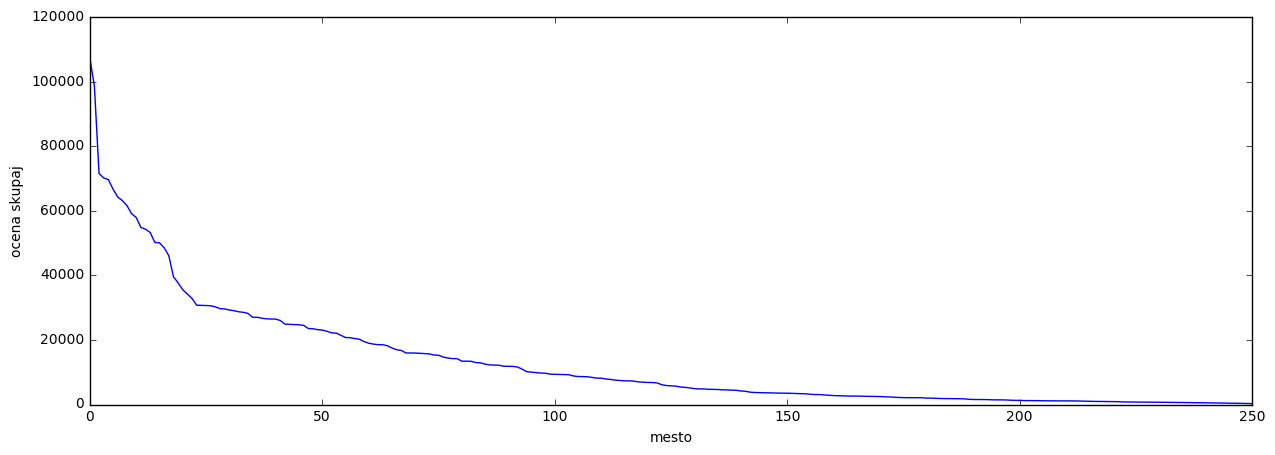

In [141]:
nova_skupna_oc = nova_lista.sort_values('ocena_skupaj', ascending=False).reset_index(level=['naslov'])
graf = nova_skupna_oc['ocena_skupaj'].plot()
graf.set_xlabel("mesto")
graf.set_ylabel("ocena skupaj")

Grafa ocene ter št. glasov v odvisnosti od mesta.

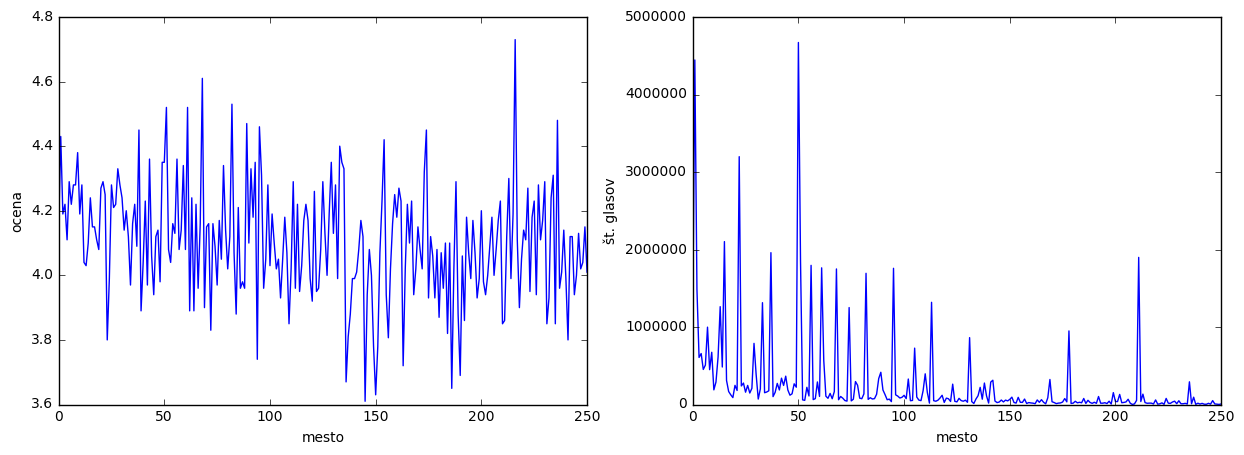

In [142]:
nova_skupna_oc = nova_lista.sort_values('ocena_skupaj', ascending=False).reset_index(level=['naslov'])

fig, axs = plt.subplots(1,2)
graf1 = nova_skupna_oc['ocena'].plot(ax=axs[0])
graf2 = nova_skupna_oc['st_glasov'].plot(ax=axs[1])
graf1.set_xlabel("mesto")
graf2.set_xlabel("mesto")
graf1.set_ylabel("ocena")
graf2.set_ylabel("št. glasov")

Grafi niso preveč lepi in si tudi niso preveč podobni. Na spletni strani, kjer sem zajela podatke, je bilo navedeno, da je skupna ocena odvisna tudi od drugih parametrov, ki pa niso bili posebaj podani. Samo za občutek vzemimo poenostavljen model, kjer je skupna ocena premo sorazmerna št. glasov ter oceni, dobljen graf pa pomnožimo še z neko konstanto, ki služi zgolj temu, da graf spravimo na enako skalo kot je skala za skupno oceno.
Sta obliki grafov kaj podobni?

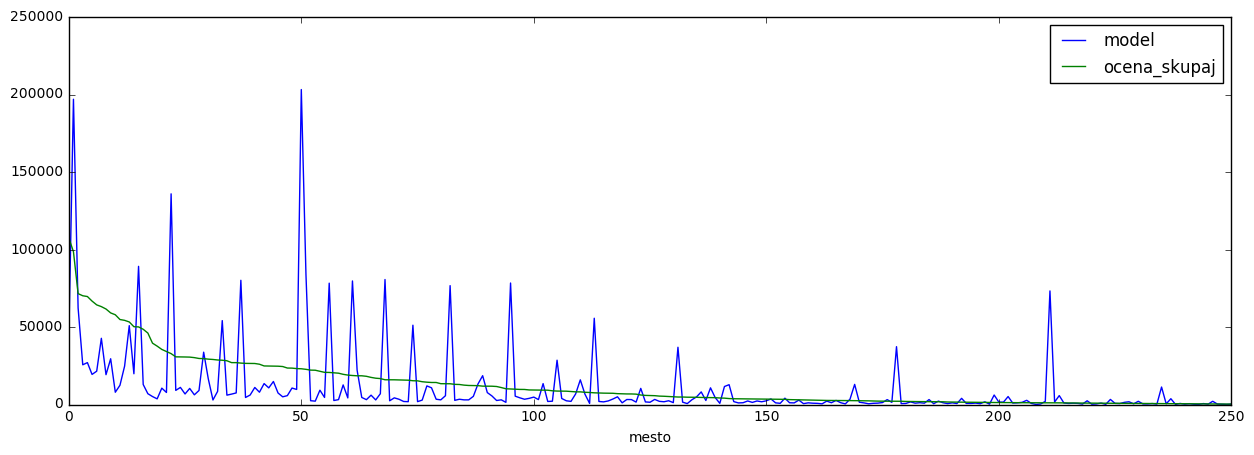

In [143]:
#uporabljene tabele

skupna_naslovi = pd.concat([lista1, lista2, lista3]).join(naslovi, on = 'id_nasl')
skupna = skupna_naslovi.join(avtorji, on = 'id_avt').set_index(['avtor', 'naslov'])

st_ponovitev = skupna_naslovi.join(avtorji, on = 'id_avt').groupby(['avtor','naslov']).count()
st_ponovitev_3 = st_ponovitev[st_ponovitev.mesto == 3].reset_index(level=['avtor','naslov'])[['avtor', 'naslov']]

nova_lista = st_ponovitev_3.join(skupna, on=['avtor', 'naslov']).groupby('naslov').mean()[['ocena','st_glasov', 'ocena_skupaj']]
nova_skupna_oc = nova_lista.sort_values('ocena_skupaj', ascending=False).reset_index(level=['naslov'])

###################################

k = st_ponovitev_3.join(skupna, on=['avtor', 'naslov']).groupby('naslov').mean()[
    ['ocena','st_glasov', 'ocena_skupaj']].sort_values('ocena_skupaj', ascending=False).reset_index(level=['naslov'])

k['model'] = k.st_glasov * k.ocena * (1/100)

pd.concat((k[['model']], nova_skupna_oc[['ocena_skupaj']]), axis = 1).plot().set_xlabel("mesto")

Podobnosti med grafoma je bolj malo. Očitno ostali dejavniki tudi precej vplivajo na skupno oceno ali pa je razmerje med dejavniki, ki vplivajo na skupno oceno, drugačno.

Za konec si poglejmo samo še nekaj informacij o naši novi listi.
Katere so najboljše uvrščene knjige in kdo so njihovi avtorji?

In [144]:
st_ponovitev_3.join(skupna, on=['avtor', 'naslov']).groupby('naslov').mean().sort_values(
    'ocena_skupaj', ascending=False).join(avtorji, on = 'id_avt')[['avtor']].head(10)


,avtor
naslov,
Charlotte's Web,E.B. White
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",J.K. Rowling
"The Lion, the Witch, and the Wardrobe (Chronicles of Narnia, #1)",C.S. Lewis
Where the Wild Things Are,Maurice Sendak
The Secret Garden,Frances Hodgson Burnett
Green Eggs and Ham,Dr. Seuss
"Anne of Green Gables (Anne of Green Gables, #1)",L.M. Montgomery
Where the Sidewalk Ends,Shel Silverstein
Matilda,Roald Dahl


Katere knjige imajo vsaj 500000 glasov in oceno manjšo od 4.0?

In [145]:
nova_lista[(nova_lista['st_glasov'] >= 500000) & (nova_lista['ocena'] < 4.0)]

,ocena,st_glasov,ocena_skupaj
naslov,,,
Animal Farm,3.86,1898145.0,1102.333333
"Holes (Holes, #1)",3.93,727345.0,8667.333333
The Adventures of Tom Sawyer,3.89,569467.0,18526.000000
"The Golden Compass (His Dark Materials, #1)",3.93,949364.0,2109.666667


Kdo je napisal Animal Farm?

In [146]:
skupna = skupna_naslovi.join(avtorji, on = 'id_avt')
skupna[skupna['naslov'] == 'Animal Farm'].drop_duplicates('avtor')[['naslov', 'avtor']]

,naslov,avtor
474,Animal Farm,George Orwell
